# Lab 6
Noah Kim Section AC

In [234]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl
import random
plt.rcParams["figure.figsize"] = (10,6)

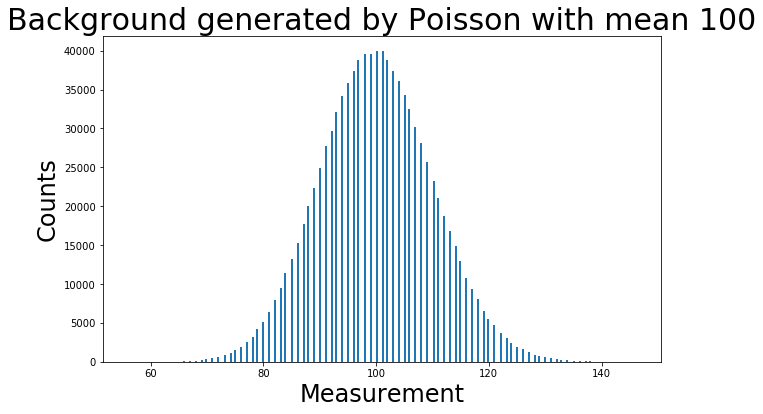

In [235]:
#Generating the random data in a poisson distribution
size = 1000000
poisson_dist = stats.poisson.rvs(100,size=size)
plt.hist(poisson_dist,bins=250)
plt.ylabel("Counts", fontsize = '24')
plt.xlabel("Measurement", fontsize = '24')
plt.title("Background generated by Poisson with mean 100", fontsize = '30')
plt.show()

## Problem 1

In [236]:
prob = stats.norm.sf(5)
thresh = stats.poisson.ppf(1-prob,100)
print(thresh)

154.0


## Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

In [237]:
prob = stats.norm.sf(8)
thresh = stats.poisson.isf(prob,100)
print(thresh)

190.0


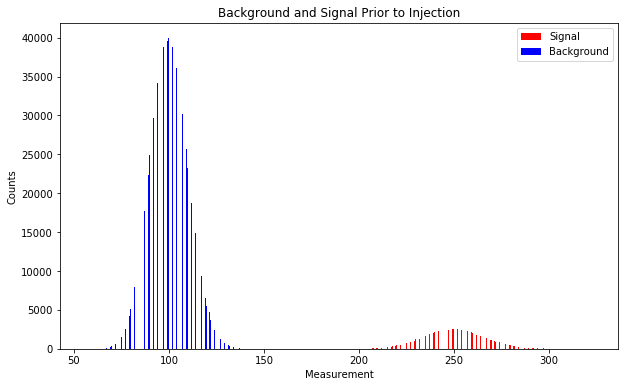

In [238]:
signal_mean = 250
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, poisson_dist], bins = 400, color=['red','blue'],label=['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

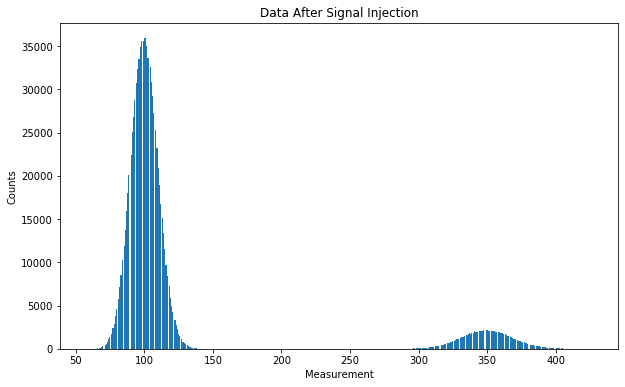

In [241]:
bkgd = poisson_dist;

signal_injected = np.zeros(bkgd.size)
for i in range(signal_injected.size):
    if i < signal.size:
        signal_injected[i] = np.add(bkgd[i], signal[i])
    else:
        signal_injected[i] = bkgd[i]

plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

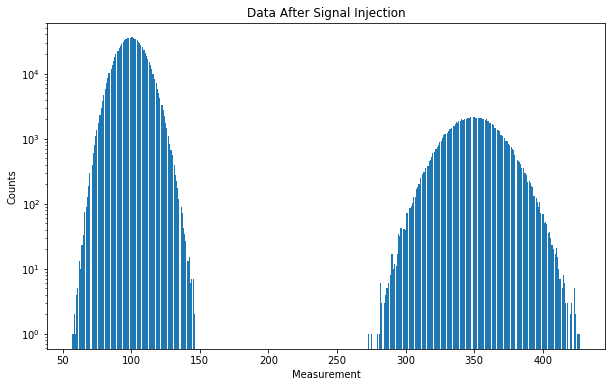

In [242]:
plt.hist(signal_injected,bins = 450)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

A)
B)

## Problem 3

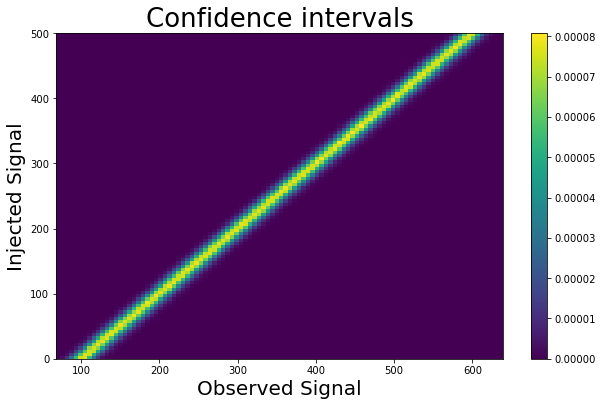

In [243]:
bkgd = poisson_dist;
signal = np.linspace(0,501,size);

observed = bkgd + signal;
h = plt.hist2d(observed, signal, bins = (100,100), density=True)
plt.colorbar(h[3])
plt.ylabel("Injected Signal", fontsize = "20")
plt.xlabel("Observed Signal", fontsize = "20")
plt.title("Confidence intervals", fontsize = "26")
plt.show()